In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rc

# Regla del trapecio

In [2]:
def Function(x):
    return np.sin(x)

In [22]:
xi, xf, Npoints = 0., 0.5*np.pi, 10
X = np.linspace(xi, xf, Npoints+1)
Y = Function(X)

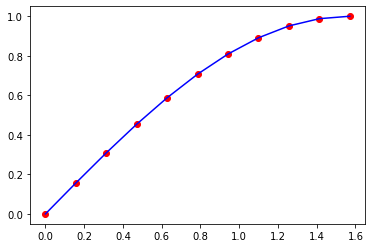

In [23]:
plt.plot(X, Y, 'b', label='f(x)')
plt.scatter(X, Y, c='r')

In [24]:
#Definimos el metodo del trapecio --> Aproximar a una linea

def TrapezeMethod(f, x, y):
    h = (x[-1] - x[0])/(len(x) - 1)
    
    integral = 0
    
    integral += 0.5*(f(x[0]) + f(x[-1]))
    
    for i in x[1:-1]:
        #Aqui no va el 0.5, pues quedaria (h/2)*(2*sum)=sum
        integral += f(i)
    
    integral *= h
    
    return integral, h

In [25]:
Integral, step = TrapezeMethod(Function, X, Y)
print(Integral)
print(step)

0.9979429863543572
0.15707963267948966


In [26]:
#Para calcular el error, necesitamos la 2da derivada de f(x)

def ddFunction(f,x,h):
    d = 0
    if(h!=0):
        d = (f(x+h) - 2*f(x) + f(x-h))/h**2
    return d

In [27]:
D2Y = ddFunction(Function, X, 0.001)

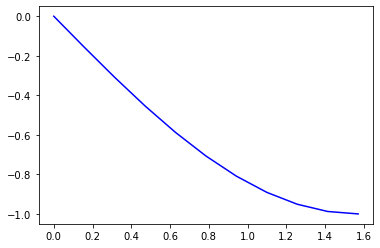

In [28]:
plt.plot(X, D2Y, 'b', label='f''(x)')

In [29]:
#Ahora, calculando el error
def ErrorTrapezeMethod(x, Yprimeprime):
    Yprimeprime = np.array(Yprimeprime)
    max_ = np.max(Yprimeprime) #Posiblemente es 0.
    
    error = -((x[-1]-x[0])**3 * max_)/(12.*len(x)**2)
    return error

In [30]:
Error = ErrorTrapezeMethod(X, D2Y)
print(Error)

-0.0


Claramente, el error no es 0, porque la integral exacta me da 1.0 Lo que pasa es que el máximo de la segunda derivada es 0.

Entonces, tomamos el error medio.

In [31]:
def ErrorTrapezeMethodCorregido(x, Yprimeprime):
    Yprimeprime = np.array(Yprimeprime)
    max_ = np.mean(Yprimeprime)
    
    error = -((x[-1]-x[0])**3 * max_)/(12.*len(x)**2)
    return error

In [32]:
Error = ErrorTrapezeMethodCorregido(X, D2Y)
print(Error)

0.001662981862267617


$$ I \approx 0.997 \pm 0.002$$

# Regla de Simpson

In [33]:
def SimpsonMethod(f,x,y):
    h = (x[-1]-x[0])/(len(x)-1)
    integral = 0
    integral += f(x[0]) + f(x[-1])
    for i in range(len(x[1:-1])):
        if(i%2 == 0):
            #Si i es par, sumo los impares
            integral += 4.*f(x[i+1])
        else:
            #Si i es impar, sumo los impares
            integral += 2.*f(x[i+1])
    
    integral *= h/3
    return integral, h

In [34]:
IntegralSimpson, stepSimpson = SimpsonMethod(Function, X, Y)
print(IntegralSimpson, stepSimpson)

1.0000033922209004 0.15707963267948966


In [36]:
error = (step **4)*(X[-1] - X[0])/180
print(error)

5.312841749744469e-06
